# Time series tools package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.io import output_file, output_notebook, show
import warnings
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
data = pd.read_csv("data/walmart_stock.csv", index_col="Date", parse_dates=True)

In [4]:
data.head()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

In [5]:
open = data['Open']

In [6]:
open.shape

(1258,)

# Plotting the data

In [7]:
from mltools.plottingTool.mltools_plot import time_series_plot

In [8]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.6)
show(f2)

Loading BokehJS ...

# Reconstruct Time Series

In [9]:
from mltools.timeSeriesTools import imputeTS

In [10]:
#removing some data
partial_df = open[~open.index.isin(pd.date_range(start = '2014-01-09', end='2014-04-12', freq='D'))]

In [11]:
partial_df.shape

(1193,)

In [12]:
complete_data = imputeTS.ReconstructTS(data=partial_df, start = open.index[0], end = open.index[-1], freq='D')

In [13]:
complete_data.shape

(1824, 1)

In [14]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = complete_data, fig=f2, alpha = 0.6)
show(f2)

Loading BokehJS ...

It is also possible to reconstruct the serie using a linear interpolation. This is possible by setting the "interpolate" flag equal to True and we can also choose to limit the acceptable number of consecutive NaN equal to 5:

In [15]:
complete_data = imputeTS.ReconstructTS(data=partial_df, start = open.index[0], end = open.index[-1], freq='D', 
                                       interpolate=True, window=5)

In [16]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = complete_data, fig=f2, alpha = 0.6)
show(f2)

Loading BokehJS ...

# Smoothing filters

### Smoothing by resample the time series 

In [17]:
from mltools.timeSeriesTools import smoothingFilters

In [18]:
mean_5day = smoothingFilters.AggregateData(method="mean", interval="5D")
max_5day = smoothingFilters.AggregateData(method="max", interval="5D")
min_5day = smoothingFilters.AggregateData(method="min", interval="5D")
perc_5day = smoothingFilters.AggregateData(method="percentile", interval="5D", percentile=0.25)

In [19]:
open_mean_5day = mean_5day.fit(open)
open_max_5day = max_5day.fit(open)
open_min_5day = min_5day.fit(open)
open_perc_5day = perc_5day.fit(open)

In [20]:
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.6)
f2 = time_series_plot.plot_time_series(data = open_mean_5day, fig=f2, color = "red", linestyle="dashed", legend="mean")
f2 = time_series_plot.plot_time_series(data = open_max_5day, fig=f2, color = "green", linestyle="solid", legend = "max")
f2 = time_series_plot.plot_time_series(data = open_min_5day, fig=f2, color = "orange", linestyle="solid", legend = "min")
f2 = time_series_plot.plot_time_series(data = open_perc_5day, fig=f2, color = "lightblue", linestyle="dashed", legend = "percentile")
show(f2)

### Moving average

We can use a simple moving average or an exponential moving average:

In [21]:
simple_ma = smoothingFilters.MovingAverage(method="simple", window_size=5)
exp_ma = smoothingFilters.MovingAverage(method="exponential", window_size=8)

In [22]:
simple_ma_data = simple_ma.fit(open)
exp_ma_data = exp_ma.fit(open)

In [23]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.6, color = "green", linewidth=2)
f2 = time_series_plot.plot_time_series(data = simple_ma_data, fig=f2, alpha = 0.6, color = "blue", legend = "simple MA")
f2 = time_series_plot.plot_time_series(data = exp_ma_data, fig=f2, alpha = 0.6, color = "red", legend = "exponential MA")
show(f2)

Loading BokehJS ...

### Savitzky Golay filter

In [24]:
savgol = smoothingFilters.SavGol_smoothing(polyorder=1, window_size=5)

In [25]:
savgol_data = savgol.fit(open)

In [26]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.6, color = "green", linewidth=2)
f2 = time_series_plot.plot_time_series(data = savgol_data, fig=f2, alpha = 0.6, color = "blue", legend = "Sav-Gol Filter")
show(f2)

Loading BokehJS ...

# Trend analysis

In [27]:
from mltools.timeSeriesTools import trendAnalysis

### Linear Trend

In [28]:
linear_regression = trendAnalysis.TrendAnalysis(method="linear")

In [29]:
linear_trend = linear_regression.fit(open)

In [30]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.6, color = "blue", linewidth=1)
f2 = time_series_plot.plot_time_series(data = linear_trend, linewidth=3, fig=f2, alpha = 0.6, color = "red", legend = "Linear trend")
show(f2)

Loading BokehJS ...

### Lowess Trend

In [31]:
lowess_regression = trendAnalysis.TrendAnalysis(method="lowess", smooth=0.2)

In [32]:
lowess_trend = lowess_regression.fit(open)

In [112]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.6, color = "blue", linewidth=1)
f2 = time_series_plot.plot_time_series(data = lowess_trend, linewidth=2, fig=f2, alpha = 0.6, color = "red", legend = "Lowess trend")
show(f2)

Loading BokehJS ...

### Expanding mean

In [34]:
expanding_mean = trendAnalysis.TrendAnalysis(method="expanding_mean", period=1)

In [35]:
expanding_trend = expanding_mean.fit(open)

In [113]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.6, color = "blue", linewidth=1)
f2 = time_series_plot.plot_time_series(data = expanding_trend, linewidth=2, fig=f2, alpha = 0.6, color = "red", legend = "Lowess trend")
show(f2)

Loading BokehJS ...

### Bollinger bands

In [37]:
bollinger_bands = trendAnalysis.TrendAnalysis(method="bollinger_bands", windows_size=20, delta=2)

In [38]:
upper_band, lower_band = bollinger_bands.fit(open) 

In [114]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.6, color = "blue", linewidth=1)
f2 = time_series_plot.plot_time_series(data = upper_band, linewidth=1, fig=f2, alpha = 0.6, color = "red", legend = "Upper band")
f2 = time_series_plot.plot_time_series(data = lower_band, linewidth=1, fig=f2, alpha = 0.6, color = "green", legend = "Lower band")
show(f2)

Loading BokehJS ...

# ETS Decomposition

In [40]:
from mltools.timeSeriesTools import ets

In [41]:
ets.ETS_decomposition.methods_avaible

['ssa', 'hp_filter', 'seasonal_decomposition']

In [42]:
airline_passanger = pd.read_csv("data/airline_passengers.csv", index_col="Month")

In [43]:
airline_passanger.tail()

Thousands of Passengers
Month                                                                      
1960-09                                                               508.0
1960-10                                                               461.0
1960-11                                                               390.0
1960-12                                                               432.0
International airline passengers: monthly total...                      NaN

In [44]:
airline_passanger.dropna(inplace=True)

In [45]:
airline_passanger.index = airline_passanger.index.astype("datetime64[ns]")

In [115]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = airline_passanger, fig=f2, alpha = 0.6)
show(f2)

Loading BokehJS ...

### Hodrick-Prescott filter

In [47]:
hp_filter = ets.ETS_decomposition(method="hp_filter")

In [48]:
cycle, trend = hp_filter.fit(airline_passanger["Thousands of Passengers"])

In [116]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = airline_passanger["Thousands of Passengers"], fig=f2, alpha = 0.6, color = "blue", linewidth=1)
f2 = time_series_plot.plot_time_series(data = trend, linewidth=2, fig=f2, alpha = 0.6, color = "red", legend = "Trend")
f2 = time_series_plot.plot_time_series(data = cycle, linewidth=2, fig=f2, alpha = 0.6, color = "orange", legend = "Cycle")
show(f2)

Loading BokehJS ...

### SSA Decomposition

In [50]:
ssa_L5 = ets.ETS_decomposition(method="ssa", L = 5)

In [51]:
F_ssa_L5 = ssa_L5.fit(open)

In [52]:
ssa_comp = F_ssa_L5.components_to_df()

In [53]:
ssa_comp.head()

F0        F1        F2        F3        F4
Date                                                         
2012-01-03  59.583658  0.527294 -0.012551 -0.045989 -0.082412
2012-01-04  59.533236  0.345351  0.129947  0.055651  0.145813
2012-01-05  59.441870  0.112904 -0.022204 -0.005591 -0.176981
2012-01-06  59.419462 -0.096529 -0.037371 -0.046935  0.181371
2012-01-09  59.397197 -0.191433 -0.054972  0.047434 -0.168226

In [54]:
F_ssa_L5.plot_wcorr()

In [55]:
F0 = F_ssa_L5.reconstruct(0)
F1 = F_ssa_L5.reconstruct([1,2,3,4])

In [56]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = open, fig=f2, alpha = 0.4, color = "blue", linewidth=1.2, legend = "Original data")
f2 = time_series_plot.plot_time_series(data = F0, linewidth=1, fig=f2, alpha = 0.8, color = "red", legend = "F0")
f2 = time_series_plot.plot_time_series(data = F1, linewidth=1, fig=f2, alpha = 0.8, color = "green", legend = "F1")
show(f2)

Loading BokehJS ...

In [57]:
ssa_L20 = ets.ETS_decomposition(method="ssa", L=20)

In [58]:
F_ssa_L20 = ssa_L20.fit(airline_passanger["Thousands of Passengers"])
ssa_comp = F_ssa_L20.components_to_df()

In [59]:
F_ssa_L20.plot_wcorr()

In [60]:
F0 = F_ssa_L20.reconstruct(0)
F1 = F_ssa_L20.reconstruct([1,2])
F2 = F_ssa_L20.reconstruct([3,4])
F3 = F_ssa_L20.reconstruct(slice(5,12))
F4 = F_ssa_L20.reconstruct(slice(12,20))

In [61]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = F0, linewidth=1, fig=f2, alpha = 0.8, color = "blue", legend = "F0")
f2 = time_series_plot.plot_time_series(data = F1, linewidth=1, fig=f2, alpha = 0.8, color = "green", legend = "F1")
f2 = time_series_plot.plot_time_series(data = F2, linewidth=1, fig=f2, alpha = 0.8, color = "red", legend = "F2")
show(f2)

Loading BokehJS ...

In [62]:
F_ssa_L20_main_components = F_ssa_L20.get_main_components(corr_threshold=0.45,adjust=0)
F_ssa_L20_main_components.head()

$\tilde{F}^{(0)}$  $\tilde{F}^{(1)}$  $\tilde{F}^{(2)}$  \
Month                                                                 
1949-01-01         120.373887         -12.753233           6.337119   
1949-02-01         122.206905         -12.417810           8.226249   
1949-03-01         123.674058          -8.709461           4.786515   
1949-04-01         124.667052          -1.954760          -1.692226   
1949-05-01         125.623343           6.215522          -5.309354   

            $\tilde{F}^{(3)}$  
Month                          
1949-01-01          -1.957774  
1949-02-01          -0.015344  
1949-03-01          12.248888  
1949-04-01           7.979935  
1949-05-01          -5.529512

In [63]:
F0 = F_ssa_L20_main_components.iloc[:,0]
F1 = F_ssa_L20_main_components.iloc[:,1]
F2 = F_ssa_L20_main_components.iloc[:,2]
noise = F_ssa_L20_main_components.iloc[:,-1]

In [64]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = F0, linewidth=1, fig=f2, alpha = 0.8, color = "blue", legend = "F0")
f2 = time_series_plot.plot_time_series(data = F1, linewidth=1, fig=f2, alpha = 0.8, color = "green", legend = "F1")
f2 = time_series_plot.plot_time_series(data = F2, linewidth=1, fig=f2, alpha = 0.8, color = "red", legend = "F2")
f2 = time_series_plot.plot_time_series(data = noise, linewidth=1, fig=f2, alpha = 0.8, color = "purple", legend = "Noise")
show(f2)

Loading BokehJS ...

In [65]:
print(F_ssa_L20.groups)

[[0], [1, 2], [3]]


## Seasonal Decomposition

In [66]:
sd = ets.ETS_decomposition(method="seasonal_decomposition")

In [67]:
data = airline_passanger["Thousands of Passengers"]

In [68]:
trend, seasonal, residual = sd.fit(data)

In [117]:
output_notebook()
f1 = figure(x_axis_type="datetime")
f1 = time_series_plot.plot_time_series(data = data, title='Airline Passengers',
                                       linewidth=1, fig=f1, alpha = 0.8)
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = trend, title='Airline Passengers - Trend',
                                       linewidth=1, fig=f2, alpha = 0.8)

f3 = figure(x_axis_type="datetime")
f3 = time_series_plot.plot_time_series(data = seasonal, title='Airline Passengers - Seasonal',
                                       linewidth=1, fig=f3, alpha = 0.8)

f4 = figure(x_axis_type="datetime")
f4 = time_series_plot.plot_time_series(data = residual, title='Airline Passengers - residual',
                                       linewidth=1, fig=f4, alpha = 0.8)

f = gridplot([[f1], [f2], [f3], [f4]])
show(f)

Loading BokehJS ...

# Change point analysis

In [70]:
from mltools.timeSeriesTools import CPA

In [71]:
# Possiamo vedere quali metodi usare con l'attributo 'methods_av'
CPA.methods_av

['AMOC',
 'BinSeg',
 'SegNeigh',
 'PELT',
 'PROPHET',
 'wbs',
 'ecp',
 'bcp',
 'Bayesian']

This package uses R libraries that have been included in a Python wrapper. For this reason it is recommended, before using the functions provided, to use the function get_libraries to identify the necessary R libraries. Packages that are not detected can be installed directly by using the input boxes.

In [72]:
#CPA.get_libraries()

In [73]:
df = pd.read_csv("data/DJI.csv", index_col='Date', parse_dates=True)

In [74]:
df.head()

Open          High           Low         Close  \
Date                                                                 
2000-09-13  11225.030273  11231.009766  11140.740234  11182.179688   
2000-09-14  11189.580078  11208.070313  11069.339844  11087.469727   
2000-09-15  11087.839844  11110.040039  10916.919922  10927.000000   
2000-09-18  10926.419922  10935.580078  10798.169922  10808.519531   
2000-09-19  10812.219727  10839.139648  10761.910156  10789.290039   

               Adj Close     Volume  
Date                                 
2000-09-13  11182.179688  216210000  
2000-09-14  11087.469727  218810000  
2000-09-15  10927.000000  291270000  
2000-09-18  10808.519531  198950000  
2000-09-19  10789.290039  214080000

* **Changepoints for mean**

In [75]:
bayesian = CPA(method = 'Bayesian') 
cp_bayesian = bayesian.fit(data = df['Close'])

In [76]:
wbs = CPA(method = 'wbs') 
cp_wbs = wbs.fit(data = df['Close'], model_param={'n_checkpoints':5,
                                                  'penalty_wbs':'SSIC',
                                                  'n_intervals':400,
                                                  'th_wbs':0.3})

R[write to console]: hash-2.2.6 provided by Decision Patterns


R[write to console]: Loading required package: zoo

R[write to console]: 
Attaching package: ‘zoo’


R[write to console]: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [77]:
amoc = CPA(method='AMOC')
cp_amoc = amoc.fit(data = df['Close'], model_param={'n_checkpoints':5,
                                                    'penalty_bs':'AIC'})

R[write to console]: Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.



In [78]:
binseg = CPA(method='BinSeg')
cp_binseg = binseg.fit(data = df['Close'], model_param={'n_checkpoints':5,
                                                    'penalty_bs':'AIC'})

In [79]:
segneigh = CPA(method='SegNeigh')
cp_segneigh = segneigh.fit(data = df['Close'], model_param={'n_checkpoints':5,
                                                    'penalty_bs':'AIC'})

In [80]:
%time bcp = CPA(method='bcp')
cp_bcp = bcp.fit(data = df['Close'], model_param={'n_checkpoints':5,
                                                    'penalty_bs':'AIC'})

R[write to console]: Loading required package: grid



CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11 µs


In [81]:
### On MacOS Mojave I have problem to use prophet with R
#prophet = CPA(method='PROPHET')
#cp_prophet = prophet.fit(data = df['Close'])

In [82]:
%time ecp = CPA(method='ecp')
cp_ecp = ecp.fit(data = df['Close'])

R[write to console]: Loading required package: Rcpp



CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 11 µs


In [118]:
CPA.plot_changepoints(data = df['Close'],
                      cp_list=[cp_bayesian, cp_wbs, cp_amoc, cp_binseg,
                               cp_segneigh, cp_bcp, cp_ecp],
                      colors='#123456')

* **Changepoints for variance**

In [84]:
amoc = CPA(method='AMOC')
#NB: AMOC ritorna sempre ad un unico cp
cp_amoc = amoc.fit(data = df['Close'],
                   compute_mean = False,
                   model_param={'n_checkpoints':5,
                                'penalty_bs':'AIC'})

In [85]:
binseg = CPA(method='BinSeg')
cp_binseg = binseg.fit(data = df['Close'],
                       compute_mean = False,
                       model_param={'n_checkpoints':5,
                                    'penalty_bs':'AIC'})

In [86]:
segneigh = CPA(method='SegNeigh')
cp_segneigh = segneigh.fit(data = df['Close'],
                           compute_mean=False,
                           model_param={'n_checkpoints':5,
                                        'penalty_bs':'AIC'})

In [87]:
pelt = CPA(method='PELT')
cp_pelt = pelt.fit(data = df['Close'],
                   compute_mean=False,
                   model_param={'n_checkpoints':5,
                                'penalty_bs':'AIC'})

In [119]:
CPA.plot_changepoints(data = df['Close'], cp_list=[cp_amoc, cp_binseg, cp_segneigh, cp_pelt], colors='#123456')

# Forecasting

In [89]:
from mltools.timeSeriesTools import forecasting

In [90]:
# Time series log transformation 
data = pd.read_csv("data/airline_passengers.csv", index_col="Month")
data.dropna(inplace=True)
data.index = data.index.astype("datetime64[ns]")
data.columns = ['Passengers']
data.index.name = 'Months'
ts_log = np.log(data)

In [91]:
ts_log.head()

Passengers
Months                
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791

In [92]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = data["Passengers"], fig=f2, alpha = 0.6,
                                       color = "blue", linewidth=1)
show(f2)

Loading BokehJS ...

In [93]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = ts_log["Passengers"], linewidth=1, fig=f2, alpha = 0.6, color = "red")
show(f2)

Loading BokehJS ...

### Testing the stationarity 

In [94]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts_log["Passengers"])

print('Original data')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('  %s: %.3f' % (key, value))

Original data
ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
  1%: -3.482
  5%: -2.884
  10%: -2.579


In [95]:
forecasting.ForecastingTS.models_available

['SARIMAX', 'HWES', 'Prophet']

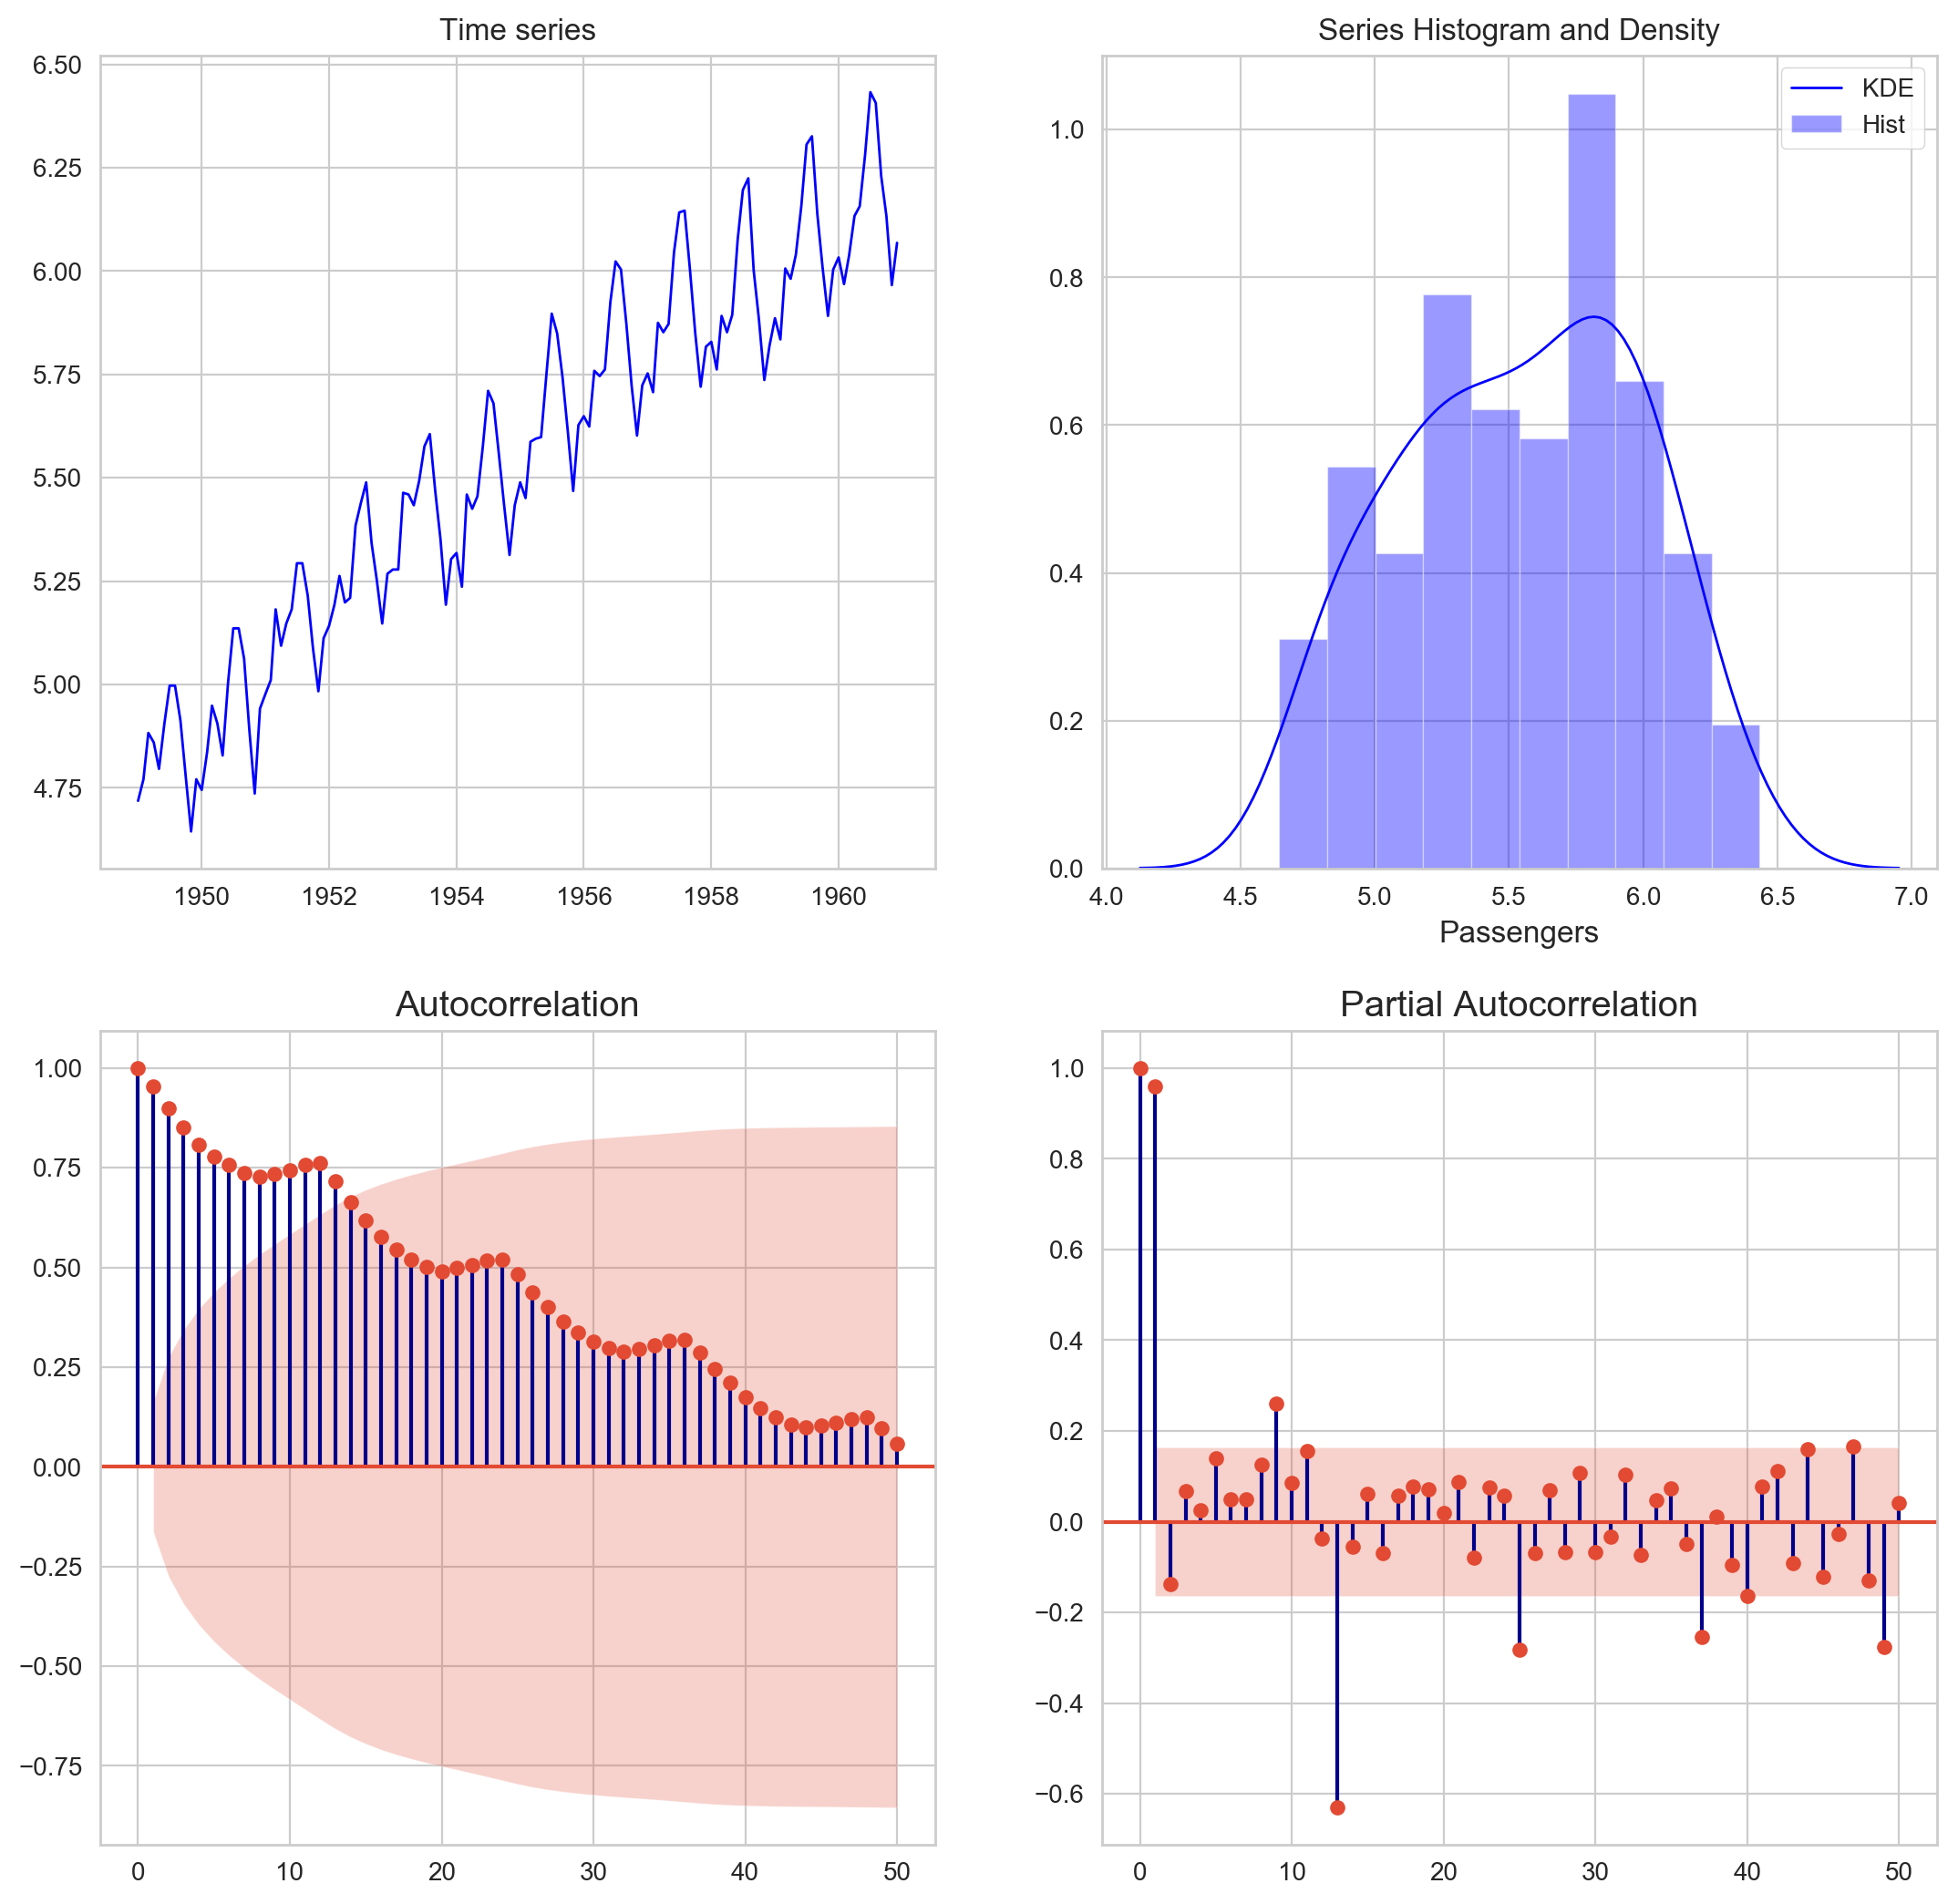

In [96]:
forecasting.plot_diagram(ts_log['Passengers'], bins=10,lags=50)

* **ARIMA**

Fittimg an ARIMA model: to fit an arima model it is sufficient to set the "exog" variable (in the dictionary model_param) as None (default).

In [97]:
# Fitting Arima model
arima = forecasting.ForecastingTS(model='SARIMAX')

As arguments of fit methos we have a pandas.Series whose index is the date of the observation. It is also possible to specify in the dictionary fit_params the other parameters as "s" (periodicity) and "max_value" (upper bound for parameters values during the gridsearch).

In [98]:
%time res_arima = arima.fit(ts_log['Passengers'], gridsearch=True, fit_params={'s': 12, 'max_value': 2})

Grid search for the SARIMAX model...
Finished parameters optimization...

The best (p,d,q) x (P,D,Q,12) are: (1, 0, 0) x (1, 0, 1, 12)
The best AIC score is: -368.6564605844083
CPU times: user 8.82 s, sys: 56.6 ms, total: 8.87 s
Wall time: 9.75 s


In [99]:
res_arima

AIC   -368.656461
BIC   -358.156569
mse      0.012709
dtype: float64

In [100]:
pred_arima = arima.predict(start_date= '1960-12', end_date='1965-12')

* **HWES (Holt-Winter's Exponential Smoothing)**

In [101]:
hwse = forecasting.ForecastingTS(model='HWES', model_params={'seasonal_periods': 12})

In [102]:
%time res_hwes = hwse.fit(ts_log['Passengers'], gridsearch=True)

Grid search for the HWES model...
Finished parameters optimization...

The best alpha, beta and gamma are: 0.71, 0.01, 0.01
The best trend and seasonal components are: add, mul
The best AIC score is: -748.1070134312253
CPU times: user 1min 55s, sys: 571 ms, total: 1min 55s
Wall time: 1min 55s


In [103]:
res_hwes

AIC   -748.107013
BIC   -704.188099
mse      0.002942
dtype: float64

In [104]:
pred_hwes = hwse.predict(start_date= '1960-12-01', end_date='1965-12-01')

* **Facebook Prophet**



In [105]:
# Fitting prophet model 
prophet = forecasting.ForecastingTS(model='Prophet')
#prophet = forecasting.ForecastingTS(model='Prophet', gridsearch=True, model_params={'growth': 'logistic'})

In [106]:
cap = pd.Series(np.repeat(ts_log['Passengers'].quantile(), repeats=len(ts_log['Passengers'])))

In [107]:
%time res_prophet = prophet.fit(ts_log['Passengers'], gridsearch=True)
#res_prophet = prophet.fit(ts_log['Passengers'], fit_params = {'cap':cap})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Grid search for the Prophet model...


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

Finished parameters optimization...

The best seasonality_mode and seasonality_prior_scale are: multiplicative, 70
The best MSE score is: 0.0030995558731532606
CPU times: user 29.1 s, sys: 76.5 ms, total: 29.2 s
Wall time: 29.4 s


In [108]:
# MSE 
res_prophet

0.0030995558731532606

In [109]:
pred_prophet = prophet.predict(start_date= '1960-12-01',
                               end_date='1965-12-01',
                               pred_params={'freq': 'MS'})

### Residuals on Training set

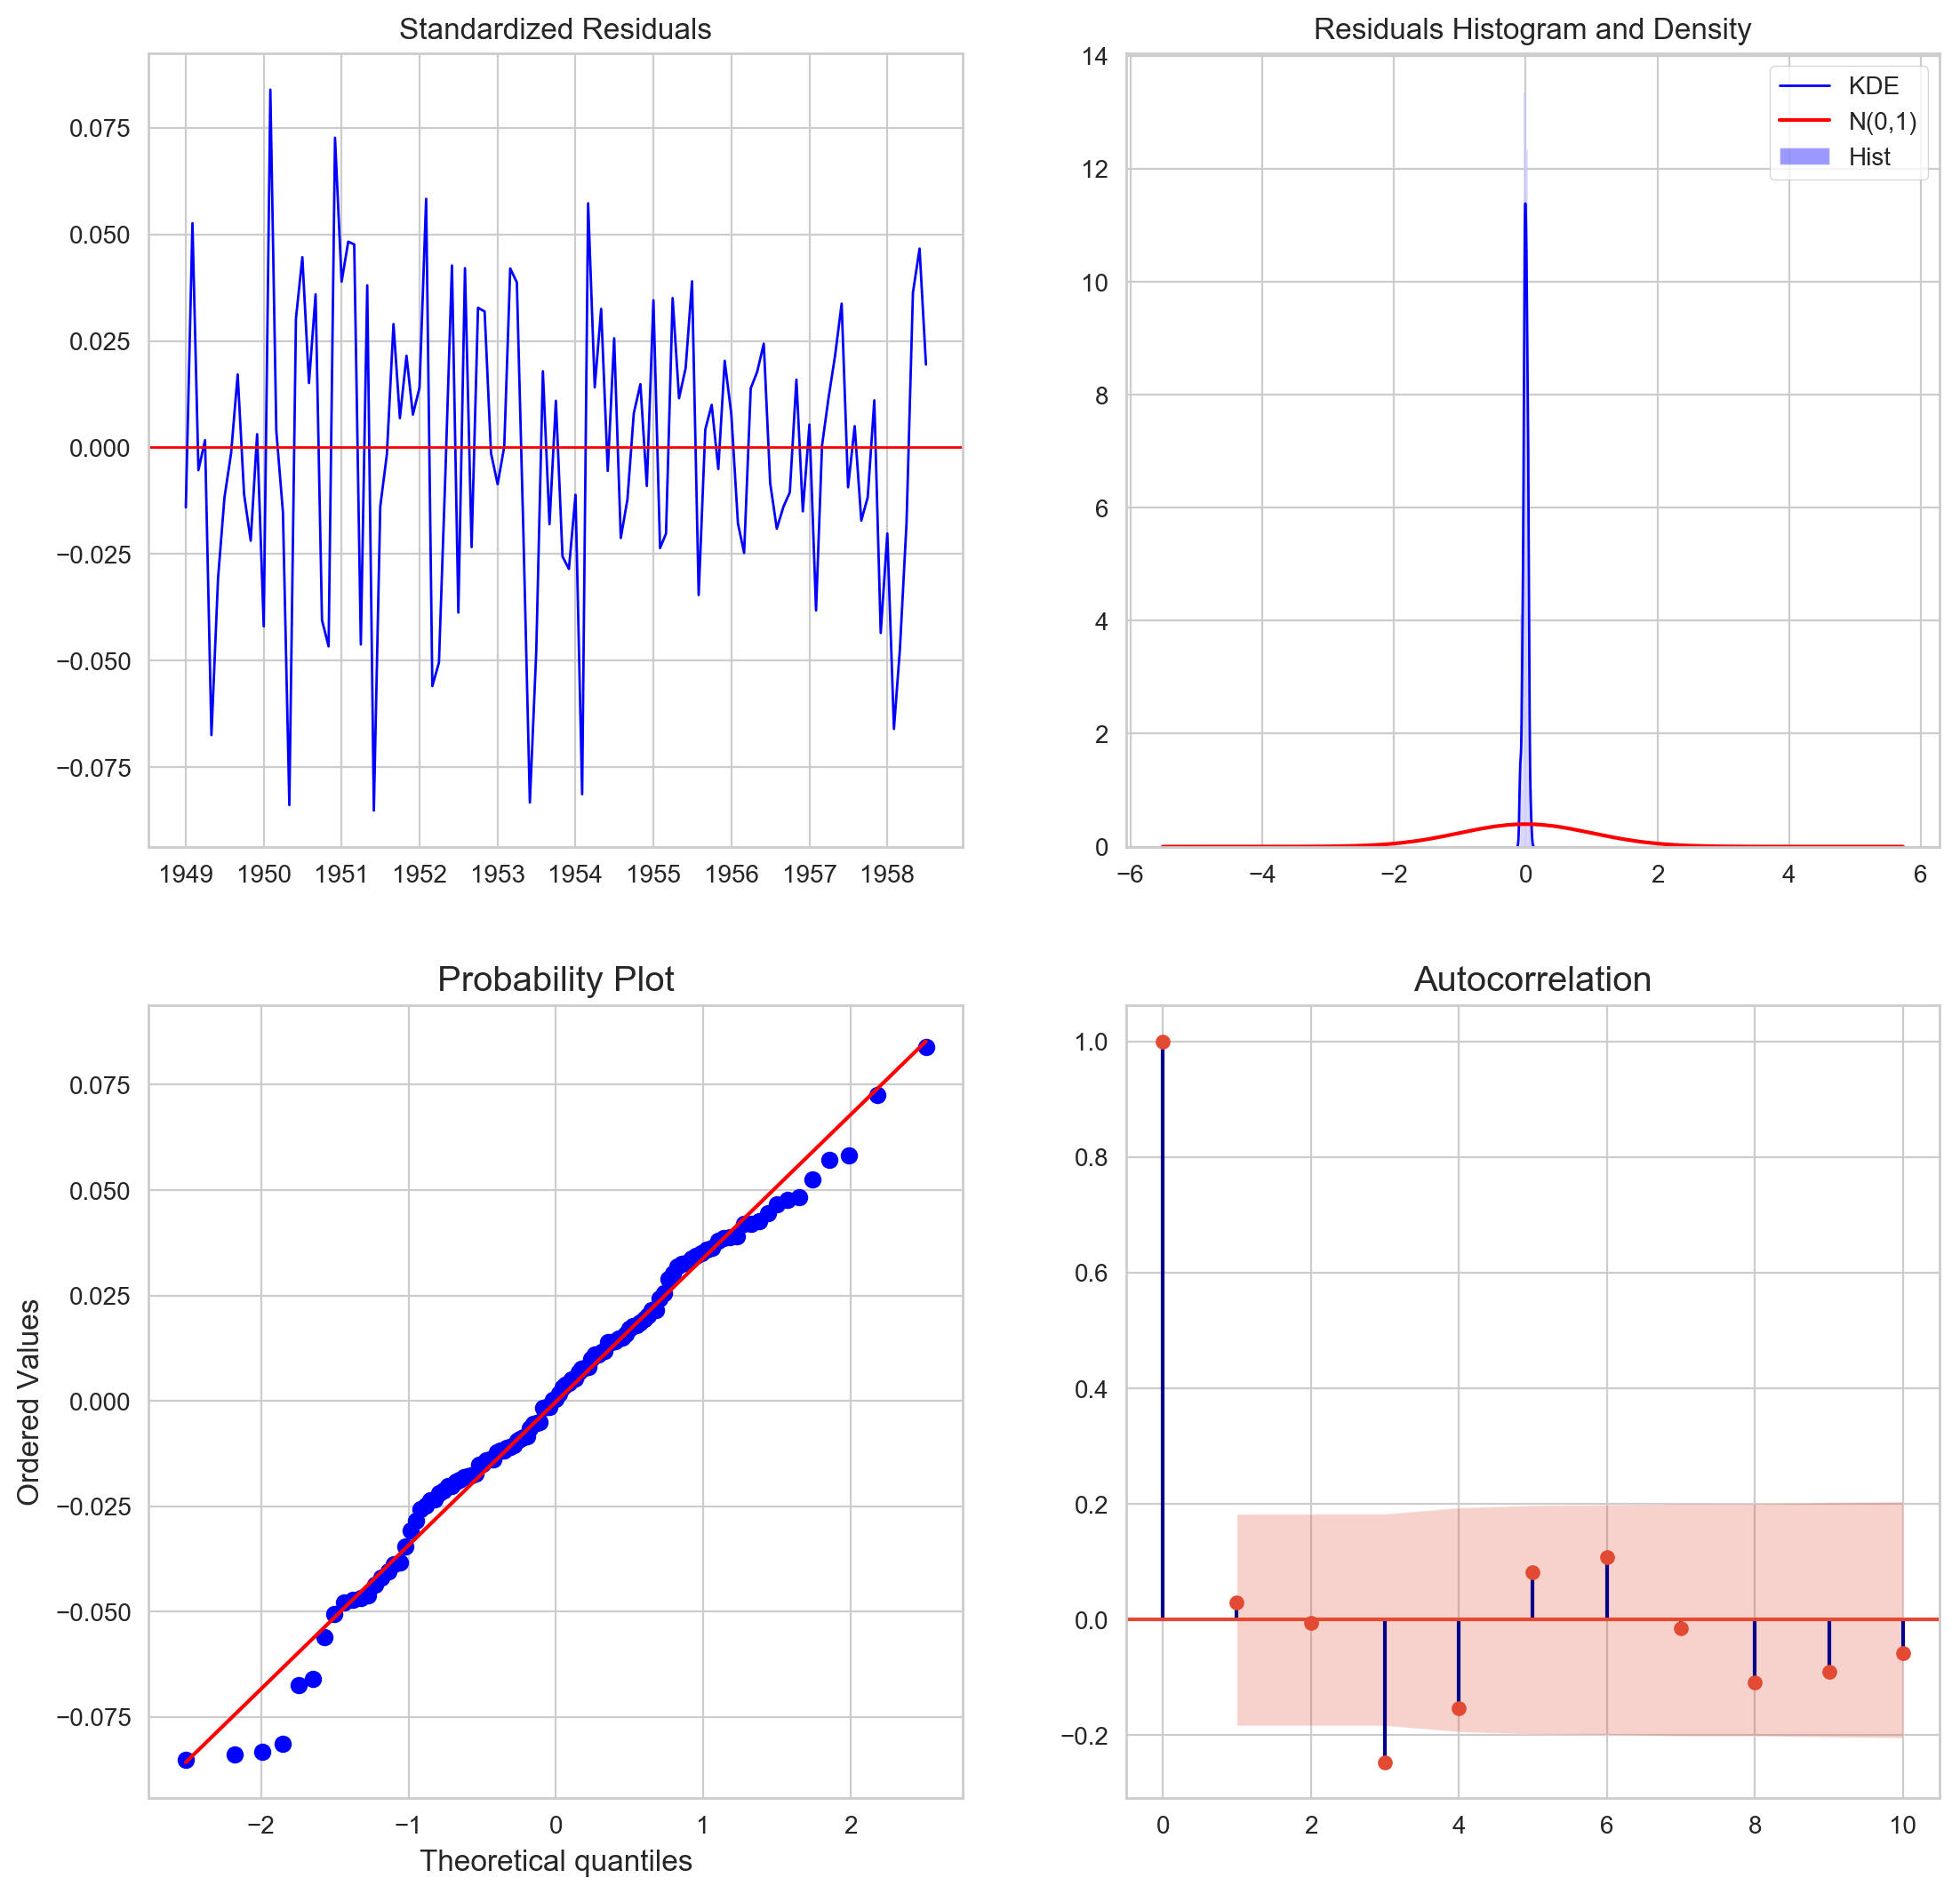

In [110]:
forecasting.plot_diagnostics(hwse.residuals)

In [111]:
output_notebook()
f2 = figure(x_axis_type="datetime")
f2 = time_series_plot.plot_time_series(data = ts_log, linewidth=1, fig=f2,
                                       alpha = 0.8, color = "blue", legend = "Passengers")
f2 = time_series_plot.plot_time_series(data = pred_arima.predicted_mean, linewidth=1, fig=f2,
                                       alpha = 0.8, color = "green", legend = "SARIMAX Forecastings")
f2 = time_series_plot.plot_time_series(data = pred_hwes, linewidth=1, fig=f2,
                                       alpha = 0.8, color = "red", legend = "HWES Forecastings")
f2 = time_series_plot.plot_time_series(data = pred_prophet, linewidth=1, fig=f2,
                                       alpha = 0.8, color = "orange", legend = "PROPHET Forecastings")
show(f2)

Loading BokehJS ...